In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 6                #number of agents
N_buckets = 60              #number of buckets
max_turns = 10*N_agents     #max number of moves in single game...each agent moves 10 times per game
weather = True              #set=True to turn on weather effects
rn_seed = 17                #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize environment
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment

environment =  {'max_turns': 60, 'rn_seed': 17, 'N_agents': 6, 'bucket_params': {'p0': array([ 0.        ,  0.00033898,  0.00067797,  0.00101695,  0.00135593,
        0.00169492,  0.0020339 ,  0.00237288,  0.00271186,  0.00305085,
        0.00338983,  0.00372881,  0.0040678 ,  0.00440678,  0.00474576,
        0.00508475,  0.00542373,  0.00576271,  0.00610169,  0.00644068,
        0.00677966,  0.00711864,  0.00745763,  0.00779661,  0.00813559,
        0.00847458,  0.00881356,  0.00915254,  0.00949153,  0.00983051,
        0.01016949,  0.01050847,  0.01084746,  0.01118644,  0.01152542,
        0.01186441,  0.01220339,  0.01254237,  0.01288136,  0.01322034,
        0.01355932,  0.01389831,  0.01423729,  0.01457627,  0.01491525,
        0.01525424,  0.01559322,  0.0159322 ,  0.01627119,  0.01661017,
        0.01694915,  0.01728814,  0.01762712,  0.0179661 ,  0.01830508,
        0.01864407,  0.01898305,  0.01932203,  0.01966102,  0.02      ]), 'sigma': array([ 0.        ,  0.00016949,  0.00

In [6]:
#initialize state
state = initialize_state(environment)
print 'state = ', state

state =  {'previous_weather': 'nominal', 'agent_locations': array([59, 20,  6, 58, 20, 16]), 'bucket_productivity': array([ 0.        ,  0.0003428 ,  0.00081115,  0.00131296,  0.00141035,
        0.00183588,  0.00106627,  0.00146871,  0.00323714,  0.00390504,
        0.00507754,  0.00459446,  0.0048141 ,  0.00586873,  0.00709756,
        0.00453025,  0.00367158,  0.0057762 ,  0.00381108,  0.00803756,
        0.00442808,  0.00588661,  0.00234301,  0.0042322 ,  0.00876228,
        0.00160189,  0.00936778,  0.0049892 ,  0.00995273,  0.01082633,
        0.00855992,  0.010745  ,  0.0083451 ,  0.01513154,  0.00972948,
        0.00949529,  0.01587855,  0.0148949 ,  0.01704212,  0.01489725,
        0.00932094,  0.01034735,  0.0047881 ,  0.01431259,  0.015801  ,
        0.01342422,  0.02985749,  0.01824344,  0.00794368,  0.01050708,
        0.02515327,  0.00868766,  0.01823274,  0.03606608,  0.018185  ,
        0.01303226,  0.01235007,  0.02489158,  0.01466128,  0.01703244]), 'weather': 'nomina

In [7]:
#show that weather can change as agents move
state = initialize_state(environment)
agent = 0
action = 0
while (False):
    state_next = update_agents(state, agent, action, environment)
    weather = state_next['weather']
    agent +=1
    if (agent >= N_agents): agent = 0
    state = copy.deepcopy(state_next)
    if (weather != 'nominal'): break
print 'state = ', state
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
state['previous_weather'] = 'hot'
print state2vector(state, environment)

state =  {'previous_weather': 'nominal', 'agent_locations': array([ 8, 31, 17, 59, 30, 17]), 'bucket_productivity': array([ 0.        ,  0.0004135 ,  0.00052402,  0.00113303,  0.00015368,
       -0.00086177,  0.00300665,  0.00233012,  0.00156339,  0.00423925,
        0.00271848,  0.00353485,  0.00565758,  0.00269714,  0.00939252,
        0.00717526,  0.00707927, -0.00089417,  0.00459942,  0.00606645,
        0.00744473,  0.00637708,  0.01493842,  0.00985603,  0.00986384,
        0.01053433,  0.01576797,  0.01319283,  0.0055137 ,  0.0029057 ,
        0.00905153,  0.01559092,  0.01356001,  0.00990289,  0.009531  ,
        0.01661036,  0.01006458,  0.02488725,  0.01386085,  0.00984878,
        0.00942428,  0.01144981,  0.02289323,  0.01543142,  0.00825791,
        0.02082062,  0.01877843,  0.01664382,  0.03174323,  0.01538767,
        0.0086627 ,  0.02626021, -0.00152707,  0.01567231,  0.04161195,
        0.01444722,  0.03210937,  0.0198281 ,  0.02575765,  0.01836162]), 'weather': 'nomina

In [8]:
#move an agent
agent = 1
action = 4
state = initialize_state(environment)
print 'state = ', state
state_next = update_agents(state, agent, action, environment)
print 'state_next = ', state_next
reward = get_reward(state_next)
print 'reward = ', reward
turn = 0
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state
state_vector_next = state_vector = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

state =  {'previous_weather': 'nominal', 'agent_locations': array([36, 21,  3, 35, 24,  5]), 'bucket_productivity': array([  0.00000000e+00,   4.41266050e-04,   3.62165752e-04,
         4.41655725e-04,   3.01943179e-04,   2.05194533e-03,
         2.23249064e-03,   2.33162605e-03,   2.92119653e-03,
         2.68358199e-03,   5.43765265e-03,   5.31393619e-03,
         6.05113937e-03,  -6.59824860e-04,   8.65087537e-03,
         6.80673195e-05,   6.44503929e-03,   3.25002905e-03,
         3.16660136e-03,   2.26898237e-03,   1.00591948e-02,
         5.09214800e-03,   8.77743315e-03,   9.37067066e-03,
         9.65059602e-03,   8.34226205e-03,   6.90639620e-03,
         1.46804066e-02,   1.44606984e-02,   2.00609270e-02,
         1.13280071e-02,   1.06118955e-02,   1.44818262e-02,
         1.23211247e-03,   1.35649717e-02,   1.07097382e-03,
         1.17853840e-02,   1.78683542e-02,   6.94898494e-03,
         5.52786267e-03,   1.38751616e-02,   1.13104973e-02,
         1.43034909e-02,   1.9

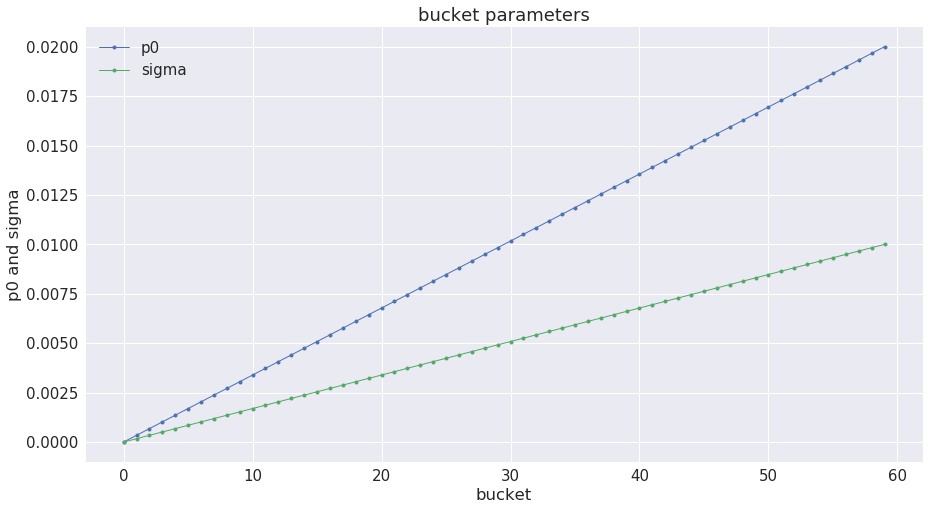

In [9]:
#plot p0 and sigma:
p0 = environment['bucket_params']['p0']
sigma = environment['bucket_params']['sigma']
xp = np.arange(len(p0))
yp = p0
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('bucket parameters')
p = ax.set_xlabel('bucket')
p = ax.set_ylabel('p0 and sigma')
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='p0')
yp = sigma
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='sigma')
p = ax.legend()

In [10]:
#play one game of randomly-moving agents and stash history in dataframe
strategy = 'random'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
print 'number of memories = ', len(memories)
reward_history.head()

number of memories =  61


,turn,weather,action,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5
0,0,nominal,2,6.049706,1.000170,1.017205,1.000463,1.002650,1.020133,1.009086
1,1,nominal,9,6.099777,1.000744,1.021400,1.005470,1.010939,1.046178,1.015047
2,2,nominal,32,6.135539,1.001446,1.024203,1.009460,1.020491,1.059065,1.020874
3,3,nominal,12,6.192868,1.002019,1.025802,1.031303,1.026639,1.073452,1.033654
4,4,nominal,58,6.229430,1.002670,1.029031,1.030678,1.028938,1.091136,1.046977


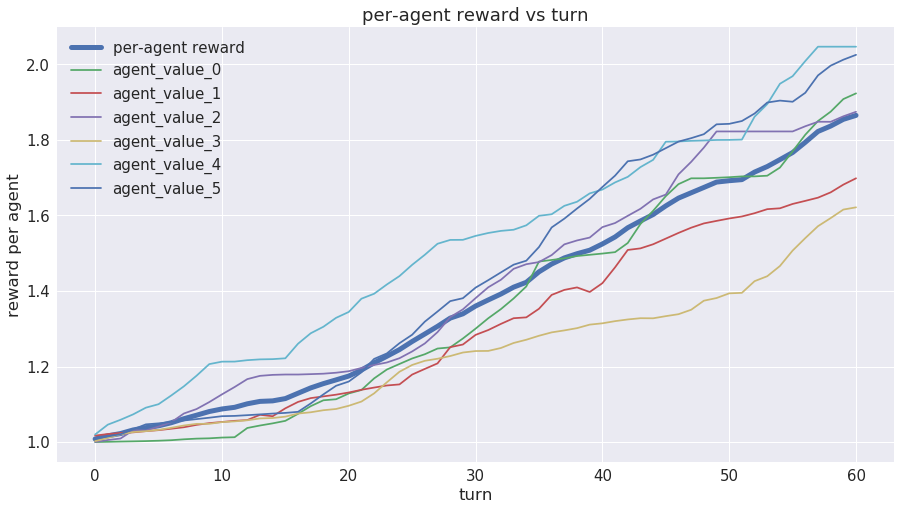

In [11]:
#plot per-agent reward versus turn, and agent values vs turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

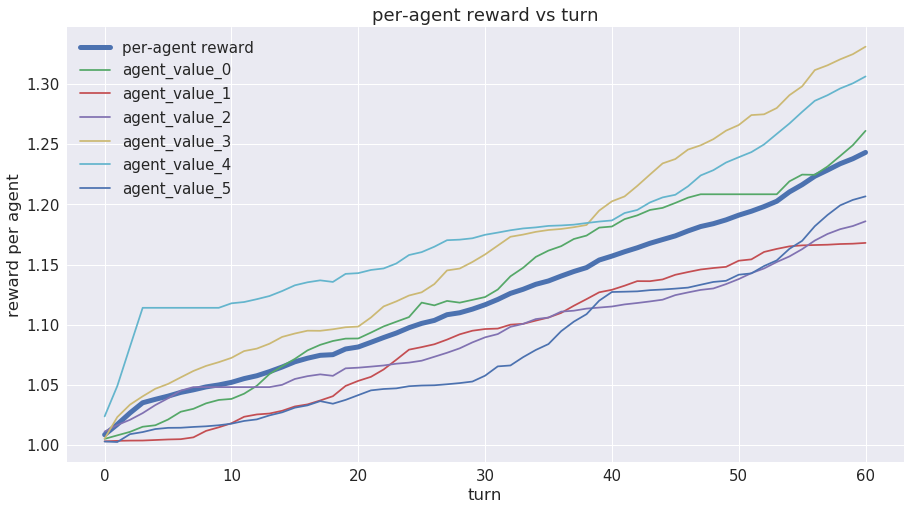

In [12]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
strategy = 'low'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

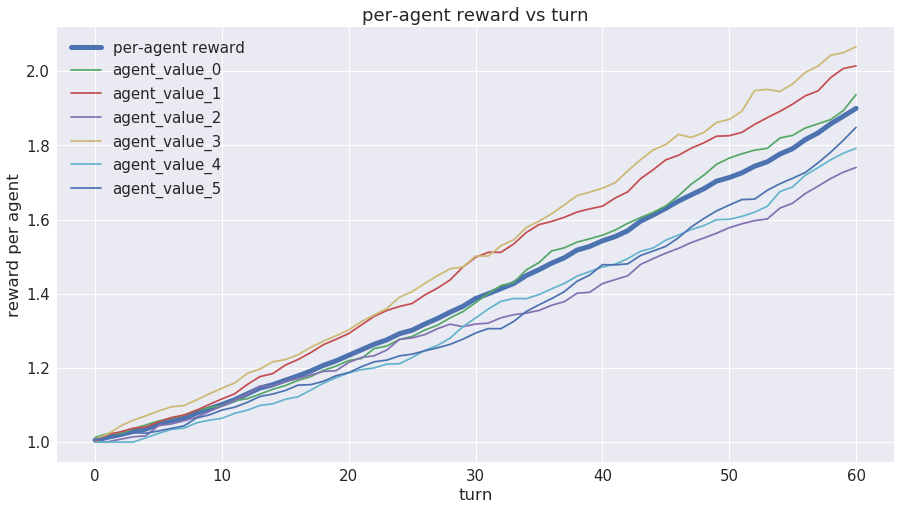

In [13]:
#play a middle-risk, middle-reward game with all agents moving randomly among the middle third of buckets
strategy = 'middle'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

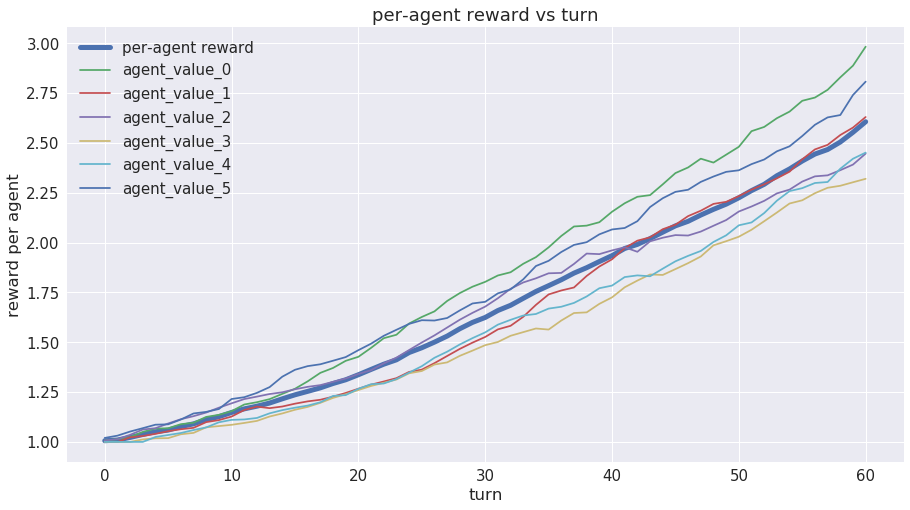

In [14]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
strategy = 'high'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [15]:
#play 30 games using various strategies, and generate stats for each strategy
N_games = 30
strategies = ['low', 'middle', 'high']#, 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.tail()

strategy =  low
strategy =  middle
strategy =  high


mean       std
strategy turn                     
middle   56    10.725476  0.051340
         57    10.842943  0.052145
         58    10.954680  0.052956
         59    11.065437  0.056149
         60    11.174310  0.057571

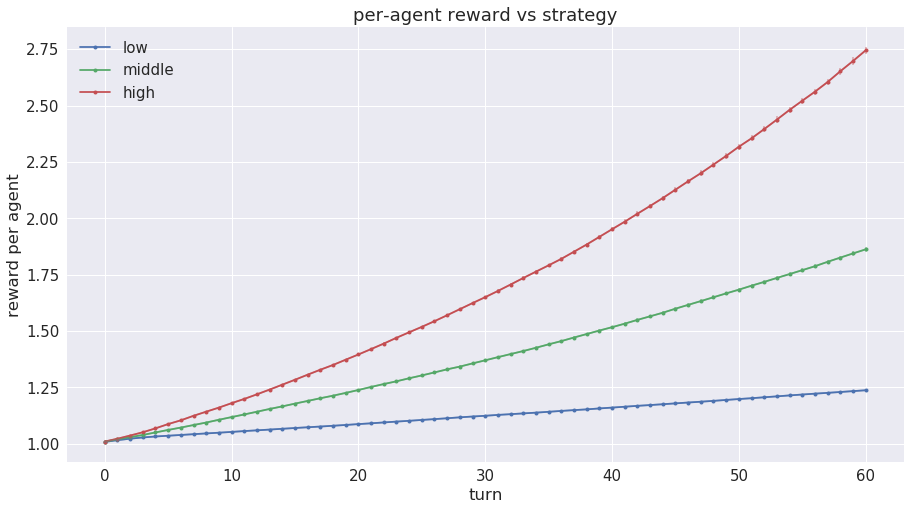

In [16]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [17]:
#play 500 random games and store moves in memories heap with random priority
N_games = 125
strategy = 'random'
memories = []
import heapq
for N_game in range(N_games):
    game_memories = play_game(environment, strategy)
    priority = random.uniform(0.0, 1.0)
    heapq.heappush(memories, (priority, game_memories))
print 'number of memories = ', len(memories)

number of memories =  125


In [18]:
#build model
state_vector = state2vector(state, environment)
N_inputs = state_vector.shape[1]
N_outputs = N_buckets
N_neurons = 5*N_buckets
model = mlp_model(N_inputs, N_neurons, N_outputs)
print 'N_agents = ', N_agents
print 'N_buckets = ', N_buckets
print 'N_inputs = ', N_inputs
print 'N_neurons = ', N_neurons
print model.summary()

Using TensorFlow backend.


N_agents =  6
N_buckets =  60
N_inputs =  123
N_neurons =  300
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               37200     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                9060      
Total params: 91,410
Trainable params: 91,410
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
#train model
N_training_games = 1000                      #number of games played during training
N_validation_games = 5                      #number of smart games played after each training game
gamma = 0.75                                #discount for future rewards
batch_size = 5*max_turns                    #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, games, epsilons, validation_reward, games_used = \
    train(environment, model, N_training_games, N_validation_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

batch_size =  300
training model
.

/Users/joe/miniconda2/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... 

final epsilon =  0.02


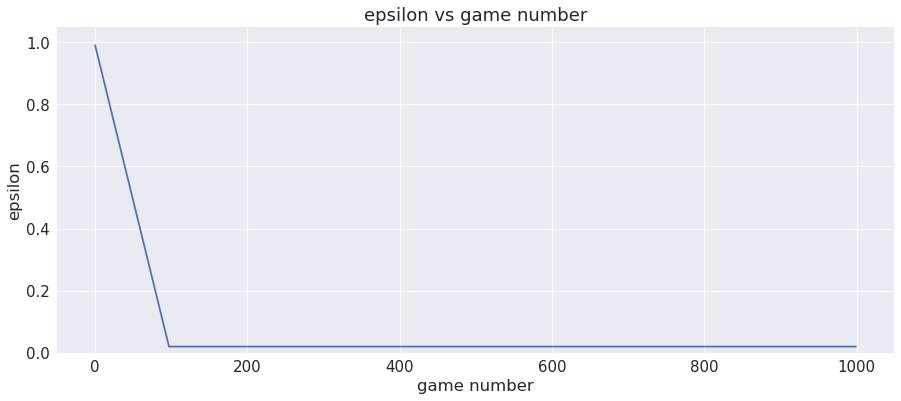

In [20]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = epsilons
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')
p = ax.set_ylim(0.0, 1.05)
print 'final epsilon = ', epsilons[-1]

fraction of games used for training =  0.319


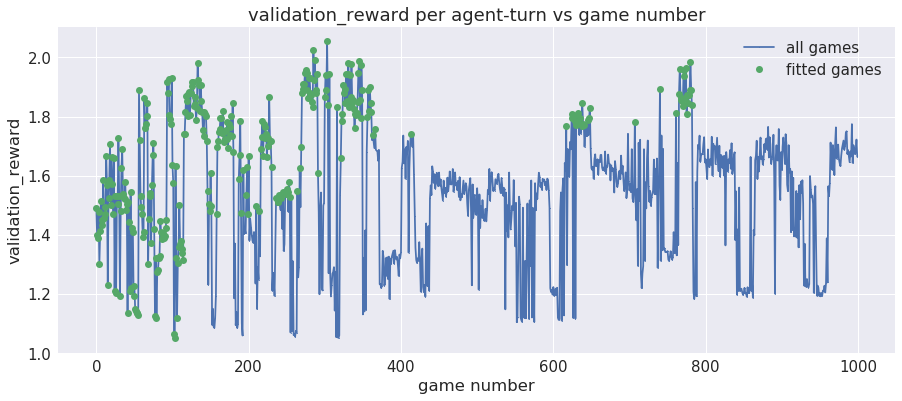

In [21]:
#plot median_validation_rewards vs validation game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = validation_reward/N_agents/max_turns
p = ax.plot(xp, yp, marker='o', linestyle='-', markersize=1, label='all games')
xp_used = xp[games_used]
yp_used = yp[games_used]
p = ax.plot(xp_used, yp_used, marker='o', linestyle='none', markersize=7, label='fitted games')
p = ax.set_title('validation_reward per agent-turn vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('validation_reward')
p = ax.legend()
print 'fraction of games used for training = ', len(games_used)*1.0/len(games)

In [22]:
#play smart game using trained model to select best action
strategy = 'smart'
memories = play_game(environment, strategy, model=model)
reward_history = memories2timeseries(memories, environment)
reward_history.head(10)

,turn,weather,action,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5
0,0,nominal,46,6.043003,1.019951,1.009934,1.000804,1.007174,1.004336,1.000804
1,1,nominal,46,6.074727,1.030442,1.020322,1.002103,1.016526,1.003231,1.002103
2,2,nominal,46,6.127360,1.041506,1.031277,1.012862,1.031542,1.006207,1.003966
3,3,nominal,46,6.228920,1.065824,1.055357,1.036512,1.055628,1.009212,1.006386
4,4,nominal,46,6.274950,1.074852,1.064296,1.045292,1.064570,1.017761,1.008180
5,5,nominal,46,6.386204,1.093909,1.083166,1.063825,1.083444,1.035805,1.026054
6,6,nominal,46,6.501589,1.113674,1.102736,1.083046,1.103020,1.054520,1.044593
7,7,nominal,46,6.592317,1.129215,1.118125,1.098159,1.118412,1.069236,1.059170
8,8,nominal,46,6.680128,1.144256,1.133018,1.112787,1.133310,1.083478,1.073278
9,9,nominal,46,6.802378,1.165197,1.153753,1.133152,1.154050,1.103306,1.092920


nominal 61
stormy 0
hot 0


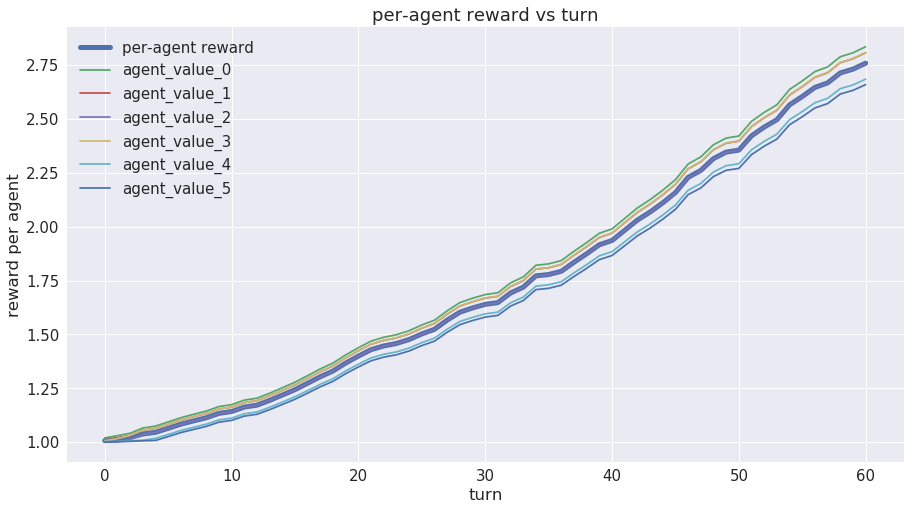

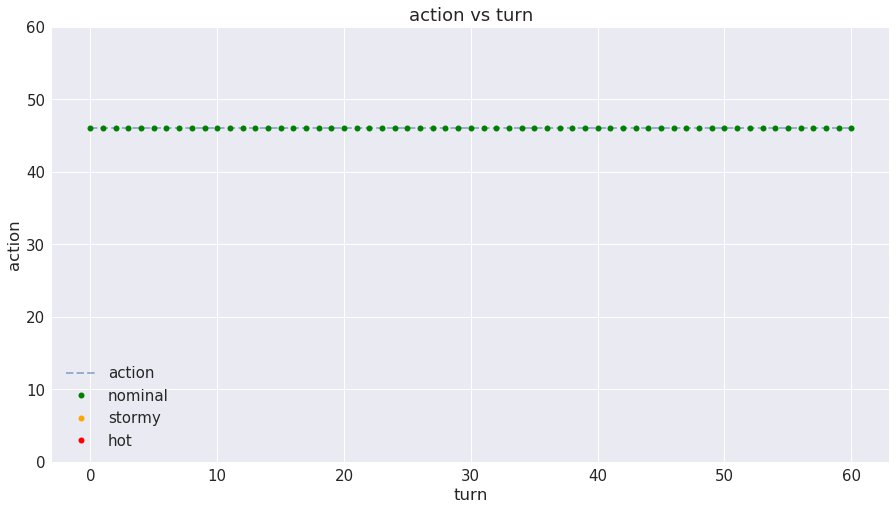

In [23]:
#plot agents value versus turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()
#plot action vs turn
xp = df['turn']
yp = df['action']
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('action vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('action')
p = ax.set_ylim(0, N_buckets)
p = ax.plot(xp, yp, linewidth=2, linestyle='--', alpha=0.5, label='action')
colors = ['green', 'orange', 'red']
weathers = ['nominal', 'stormy', 'hot']
for idx in range(len(weathers)):
    weather = weathers[idx]
    color = colors[idx]
    jdx = (df['weather'] == weather)
    xp = df[jdx]['turn']
    yp = df[jdx]['action']
    p = ax.plot(xp, yp, marker='o', markersize=6, color=color, linestyle='none', label=weather)
    print weather, jdx.sum()
p = ax.legend()

strategy =  low
strategy =  middle
strategy =  random
strategy =  high
strategy =  smart
strategy =  best


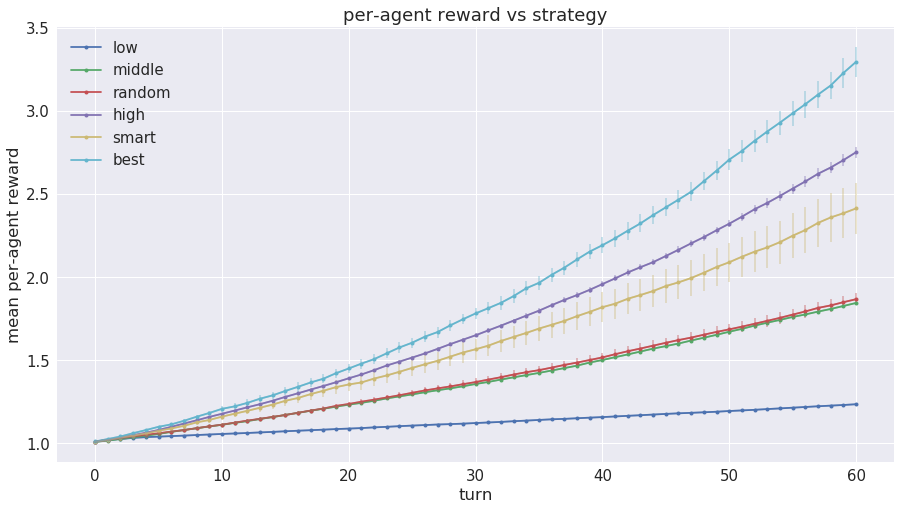

In [24]:
#play 30 games using various strategies and plot outcomes
N_games = 10
strategies = ['low', 'middle', 'random', 'high', 'smart', 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy, model=model)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean per-agent reward')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [25]:
#done! 6min on aws 4 min on laptop
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0

execution time (minutes) =  4.56107199987
